# OLS vs Ridge

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model,metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
df = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/card.dta')
df

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,1.0,548.0,0.0,15.0,NaN,1.0,0.0,16.0,6.306275,256.0
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,1.0,481.0,0.0,35.0,93.0,1.0,1.0,9.0,6.175867,81.0
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,1.0,721.0,0.0,42.0,103.0,1.0,1.0,16.0,6.580639,256.0
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,1.0,250.0,0.0,25.0,88.0,1.0,1.0,10.0,5.521461,100.0
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,1.0,729.0,0.0,34.0,108.0,1.0,0.0,16.0,6.591674,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,5218.0,0.0,1.0,12.0,25.0,8.0,12.0,82135.0,1.0,0.0,...,0.0,335.0,0.0,15.0,NaN,1.0,0.0,7.0,5.814130,49.0
3006,5219.0,0.0,1.0,13.0,34.0,NaN,NaN,88765.0,1.0,0.0,...,0.0,481.0,0.0,43.0,NaN,1.0,1.0,15.0,6.175867,225.0
3007,5220.0,0.0,1.0,12.0,24.0,11.0,NaN,89271.0,0.0,0.0,...,0.0,500.0,0.0,25.0,109.0,1.0,0.0,6.0,6.214608,36.0
3008,5221.0,0.0,1.0,12.0,31.0,NaN,NaN,110376.0,1.0,0.0,...,0.0,713.0,0.0,32.0,107.0,1.0,1.0,13.0,6.569481,169.0


In [3]:
df = df.fillna(df.median())
df

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2.0,0.0,0.0,7.0,29.0,10.0,12.0,158413.0,1.0,0.0,...,1.0,548.0,0.0,15.0,103.0,1.0,0.0,16.0,6.306275,256.0
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,1.0,481.0,0.0,35.0,93.0,1.0,1.0,9.0,6.175867,81.0
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,1.0,721.0,0.0,42.0,103.0,1.0,1.0,16.0,6.580639,256.0
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,1.0,250.0,0.0,25.0,88.0,1.0,1.0,10.0,5.521461,100.0
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,1.0,729.0,0.0,34.0,108.0,1.0,0.0,16.0,6.591674,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,5218.0,0.0,1.0,12.0,25.0,8.0,12.0,82135.0,1.0,0.0,...,0.0,335.0,0.0,15.0,103.0,1.0,0.0,7.0,5.814130,49.0
3006,5219.0,0.0,1.0,13.0,34.0,10.0,12.0,88765.0,1.0,0.0,...,0.0,481.0,0.0,43.0,103.0,1.0,1.0,15.0,6.175867,225.0
3007,5220.0,0.0,1.0,12.0,24.0,11.0,12.0,89271.0,0.0,0.0,...,0.0,500.0,0.0,25.0,109.0,1.0,0.0,6.0,6.214608,36.0
3008,5221.0,0.0,1.0,12.0,31.0,10.0,12.0,110376.0,1.0,0.0,...,0.0,713.0,0.0,32.0,107.0,1.0,1.0,13.0,6.569481,169.0


In [4]:
X = ['married', 'exper', 'expersq',
     'nearc2', 'nearc4', 'fatheduc', 'motheduc',
     'weight', 'momdad14', 'sinmom14', 'step14', 
     'reg661', 'reg662', 'reg663', 'reg664', 
     'reg665', 'reg666', 'reg667', 'reg668',
     'south66', 'black', 'smsa', 'south', 'smsa66']
Y = ['educ']

In [5]:
results = {}
r2_train = []
r2_test = []
X_train, X_test, y_train, y_test = train_test_split(df[X], df[Y], test_size= 0.2)

In [6]:
OLS=linear_model.LinearRegression()
model_OLS=OLS.fit(X_train, y_train)

In [7]:
y_pred_OLS_train=model_OLS.predict(X_train)
r2_OLS_train=metrics.r2_score(y_train,y_pred_OLS_train)
r2_train.append(r2_OLS_train)

In [8]:
y_pred_OLS_test=model_OLS.predict(X_test)
r2_OLS_test=metrics.r2_score(y_test,y_pred_OLS_test)
r2_test.append(r2_OLS_test)

In [9]:
results['OLS'] = [np.mean(r2_train), np.mean(r2_test)]

In [10]:
RIDGE=linear_model.Ridge()
model_RIDGE=RIDGE.fit(X_train, y_train)

/home/marianne/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44174e-14): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [11]:
y_pred_RIDGE_train=model_RIDGE.predict(X_train)
r2_RIDGE_train=metrics.r2_score(y_train,y_pred_RIDGE_train)
r2_train.append(r2_RIDGE_train)

In [12]:
y_pred_RIDGE_test=model_RIDGE.predict(X_test)
r2_RIDGE_test=metrics.r2_score(y_test,y_pred_RIDGE_test)
r2_test.append(r2_RIDGE_test)

In [13]:
results['RIDGE'] = [np.mean(r2_train), np.mean(r2_test)]
results

{'OLS': [0.5530026950699514, 0.445579836279995],
 'RIDGE': [0.5530048710205318, 0.44567616508831287]}

In [14]:
df_results=pd.DataFrame(data=results, index=['Train','Test'])
df_results

,OLS,RIDGE
Train,0.553003,0.553005
Test,0.445580,0.445676


In [15]:
r2_train2 = []
r2_test2 = []

In [16]:
ridge_params = {'alpha':[550, 580, 600, 620, 650]}
RIDGE2=GridSearchCV(RIDGE, param_grid=ridge_params,cv=10)

In [17]:
RIDGE2.fit(df[X], df[Y]).best_estimator_
y_pred_RIDGE2_train=model_RIDGE.predict(X_train)
r2_RIDGE2_train=metrics.r2_score(y_train,y_pred_RIDGE2_train)
r2_train2.append(r2_RIDGE2_train)

/home/marianne/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.99208e-12): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/marianne/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.92483e-12): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/marianne/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.81707e-12): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/marianne/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.11327e-12): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/marianne/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.399

# RIDGE2.fit(df[X], df[Y]).best_estimator_
y_pred_RIDGE2_test=model_RIDGE.predict(X_test)
r2_RIDGE2_test=metrics.r2_score(y_test,y_pred_RIDGE2_test)
r2_test2.append(r2_RIDGE2_test)

In [18]:
results['RIDGE2'] = [np.mean(r2_train2), np.mean(r2_test2)]

/home/marianne/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/marianne/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:
df_results=pd.DataFrame(data=results, index=['Train','Test'])
df_results

,OLS,RIDGE,RIDGE2
Train,0.553003,0.553005,0.553007
Test,0.445580,0.445676,NaN


# Logistic regression on the iris dataset

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
dataX = iris.data
datay = iris.target

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size=0.33, random_state=42)

# Fit the model

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

# Evaluation

In [23]:
pipe.score(X_train, y_train)

0.96

In [24]:
pipe.score(X_test, y_test)

0.98

# Cross validation

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, dataX, datay, cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.9       , 1.        ])

# SVM

In [26]:
from sklearn.svm import SVC

To simplify we remove the label 0

In [27]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [28]:
pipe_svm_lin = make_pipeline(StandardScaler(),SVC(kernel='linear',gamma='auto'))
pipe_svm_lin.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))])

In [29]:
pipe_svm_lin.score(X_test, y_test)

0.6060606060606061

In [30]:
cross_val_score(pipe_svm_lin, X, y, cv=7)

array([0.53333333, 0.73333333, 0.78571429, 0.5       , 0.71428571,
       0.71428571, 0.85714286])

# Decision Trees 

# Quantile regression

In [33]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn import metrics
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
y = pd.Series(boston_dataset.target)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
accuracy

0.7189062499472645

In [37]:
cross_val_score(clf, X, y, cv=7)

array([0.74605616, 0.83455842, 0.78752817, 0.77129576, 0.6767224 ,
       0.32250397, 0.48221316])

# More on the Boston Dataset

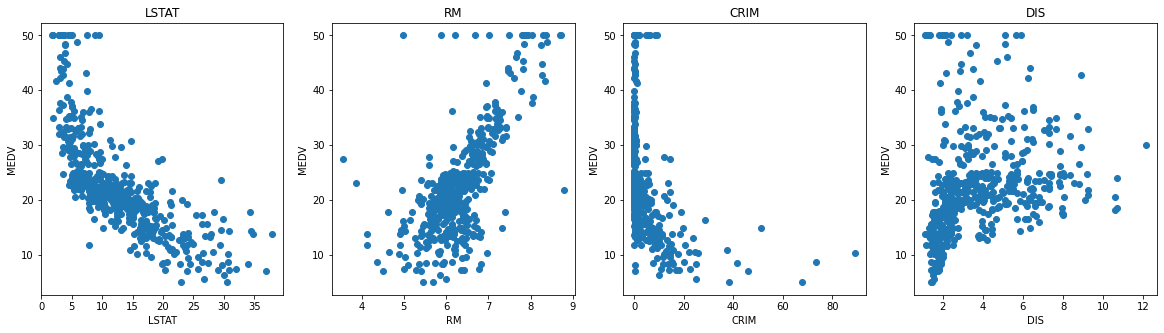

In [38]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','CRIM','DIS']
target = boston_dataset.target

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [39]:
from sklearn import preprocessing
X_scaled = pd.DataFrame(preprocessing.scale(boston))
Y_scaled = preprocessing.scale(boston_dataset.target)
X_scaled.columns = boston.columns

# OLS

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.2, random_state=5)

OLS = LinearRegression()
OLS.fit(X_train, Y_train)

# model evaluation for testing set
y_test_predict = OLS.predict(X_test)
r2 = metrics.r2_score(Y_test, y_test_predict).round(2)
print('R2 score is {}'.format(r2) )

R2 score is 0.73


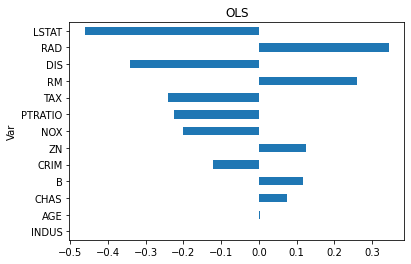

In [41]:
# Plot the coefficients in descending order
w = pd.DataFrame()
w['Var'] = X_train.columns
w = w.set_index('Var') # Set the variable names as the index
w['beta'] = OLS.coef_
w['beta_abs'] = np.abs(w['beta']) # Get the absolute value for ranking
w = w.sort_values(by='beta_abs')
w['beta'].plot.barh()
plt.title('OLS')
plt.show()

# Quantile Regression

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.quantile_regression as Q_reg
import matplotlib.pyplot as plt

In [43]:
quantiles = [0.01, 0.05, 0.50, 0.95 , 0.99]

# Get the model, the cofficients and the predictions in (a) - (c)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(Y_train, X_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['beta','beta_lower','beta_upper','quantile']
    
   # (c) Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return coefs, pred

Qreg_coefs = pd.DataFrame()
Qreg_actual_pred = pd.DataFrame()

# Get the actual and quantile predictions
for q in quantiles:
    coefs, pred = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])
    Qreg_actual_pred = pd.concat([Qreg_actual_pred,pred],axis=1)

Qreg_actual_pred.columns=quantiles
Qreg_actual_pred['actual'] = Y_test
Qreg_actual_pred['interval'] = Qreg_actual_pred[0.99] - Qreg_actual_pred[0.01]
Qreg_actual_pred = Qreg_actual_pred.sort_values('interval')
Qreg_actual_pred

,0.01,0.05,0.5,0.95,0.99,actual,interval
163,2.09,2.09,1.78,1.62,1.62,2.989460,-0.47
490,-1.70,-1.69,-1.91,-1.99,-1.99,-1.570830,-0.29
489,-1.29,-1.28,-1.49,-1.56,-1.57,-1.690551,-0.28
273,1.47,1.47,1.31,1.22,1.23,1.378665,-0.24
140,-0.59,-0.59,-0.75,-0.82,-0.82,-0.928689,-0.23
...,...,...,...,...,...,...,...
403,-1.28,-1.27,-1.15,-1.08,-1.08,-1.549063,0.20
410,-1.64,-1.64,-1.50,-1.43,-1.43,-0.819852,0.21
66,0.22,0.23,0.40,0.48,0.48,-0.340967,0.26
292,0.92,0.92,1.10,1.18,1.19,0.584152,0.27


In [44]:
r2 = metrics.r2_score(Qreg_actual_pred['actual'], Qreg_actual_pred[0.5]).round(2)
print('R2 score is {}'.format(r2) )

R2 score is 0.75


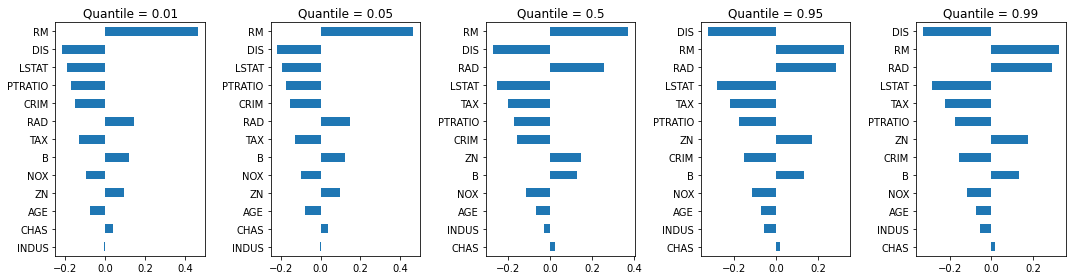

In [45]:
# Get the absolute value of the coefficients for ranking
Qreg_coefs['beta_abs'] = np.abs(Qreg_coefs['beta'] ) 
Qreg_coefs = Qreg_coefs.sort_values(by=['quantile','beta_abs'])

fig = plt.figure(figsize=(15, 4))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    w = Qreg_coefs[Qreg_coefs['quantile']==quantiles[i]]
    w['beta'].plot.barh()
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

# Quantile gradient boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
quantiles = [0.01, 0.05, 0.50, 0.95 , 0.99]

# Get the model and the predictions in (a) - (b)
def GBM(q):
    
   # (a) Modeling  
   mod = GradientBoostingRegressor(loss='quantile', alpha=q,
                                n_estimators=500, max_depth=8,
                                learning_rate=.01, min_samples_leaf=20,
                                min_samples_split=20)
   mod.fit(X_train, Y_train)

   # (b) Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return pred, mod

GBM_models=[]
GBM_actual_pred = pd.DataFrame()

for q in quantiles:
    pred , model = GBM(q)
    GBM_models.append(model)
    GBM_actual_pred = pd.concat([GBM_actual_pred,pred],axis=1)

GBM_actual_pred.columns=quantiles
GBM_actual_pred['actual'] = Y_test
GBM_actual_pred['interval'] = GBM_actual_pred[np.max(quantiles)] - GBM_actual_pred[np.min(quantiles)]
GBM_actual_pred = GBM_actual_pred.sort_values('interval')
GBM_actual_pred

,0.01,0.05,0.5,0.95,0.99,actual,interval
46,-1.72,-1.82,-1.58,-0.48,-0.41,-1.690551,1.31
16,-1.72,-1.64,-1.20,-0.26,-0.41,-0.504223,1.31
65,-1.47,-1.46,-1.38,-0.29,0.53,-1.549063,2.00
70,-1.13,-0.83,-0.58,-0.05,0.93,-0.634828,2.06
85,-1.17,-0.91,-0.84,-0.14,0.89,-1.037527,2.06
...,...,...,...,...,...,...,...
19,-1.69,-1.22,-0.29,2.75,2.19,-0.819852,3.88
100,-0.90,-0.49,-0.17,0.26,2.99,0.050848,3.89
63,-0.91,-0.31,1.40,0.98,2.99,2.042574,3.90
12,-0.92,-0.45,-0.22,0.20,2.99,-0.243013,3.91


In [47]:
r2 = metrics.r2_score(GBM_actual_pred['actual'], GBM_actual_pred[0.5]).round(2)
print('R2 score is {}'.format(r2) )

R2 score is 0.89


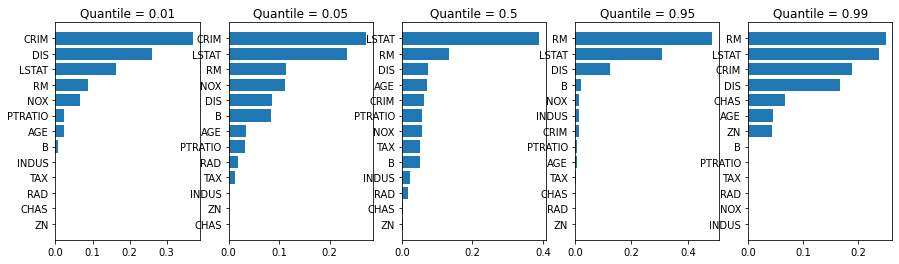

In [48]:
fig = plt.figure(figsize=(15, 4))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    feature_importance = GBM_models[i].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(boston.columns)[sorted_idx])
    plt.title('Quantile = ' + str(quantiles[i] ))

plt.show()

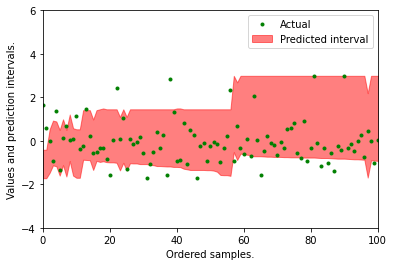

In [49]:
plt.plot(GBM_actual_pred['actual'],'go',markersize=3,label='Actual')
plt.fill_between(
    np.arange(GBM_actual_pred.shape[0]), GBM_actual_pred[0.01], GBM_actual_pred[0.99], alpha=0.5, color="r",
    label="Predicted interval")
plt.xlabel("Ordered samples.")
plt.ylabel("Values and prediction intervals.")
plt.xlim([0, 100])
plt.ylim([-4, 6])
plt.legend()
plt.show()

In [50]:
def correctPcnt(actual_pred):
    correct = 0
    for i in range(actual_pred.shape[0]):
        if actual_pred.loc[i,0.01] <= actual_pred.loc[i,'actual'] <= actual_pred.loc[i,0.99]:
            correct += 1
    print(correct/len(Y_test))
    
    
correctPcnt(GBM_actual_pred)

0.9705882352941176


# Quantile Random Forest

In [51]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=0,min_samples_split=10)
rf.fit(X_train, Y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=200, random_state=0)

In [52]:
# Get the predictions of all trees for all observations
# Each observation has N predictions from the N trees
pred_Q = pd.DataFrame()
for pred in rf.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp],axis=1)
pred_Q.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2.87,2.99,2.39,2.40,2.91,2.76,2.52,2.80,2.56,2.60,...,2.20,2.24,2.28,2.56,2.99,1.96,2.99,2.90,2.44,2.61
1,0.48,0.39,0.16,1.04,0.39,0.56,0.42,0.65,1.38,0.93,...,0.86,0.38,0.86,0.70,1.06,0.73,0.71,0.62,1.08,0.09
2,-0.02,0.02,0.11,-0.08,0.06,0.10,0.12,0.11,-0.07,-0.06,...,-0.02,0.29,-0.01,0.06,0.10,0.22,-0.03,0.31,0.09,0.14
3,-1.18,-0.95,-1.29,-1.23,-1.31,-0.95,-1.04,-1.05,-1.36,-1.56,...,-0.98,-0.72,-1.74,-1.68,-1.10,-1.20,-1.62,-1.03,-1.01,-1.09
4,2.47,1.31,2.08,2.40,2.32,2.34,2.00,1.84,0.99,2.96,...,2.20,1.36,2.28,2.56,1.18,2.52,1.05,2.25,2.44,2.61


In [53]:
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)
   
RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = Y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred

,0.01,0.05,0.5,0.95,0.99,actual,interval
11,-0.46,-0.40,-0.28,0.00,0.15,-0.38,0.61
100,-0.46,-0.41,-0.18,0.00,0.17,0.05,0.63
27,-0.50,-0.44,-0.32,0.01,0.13,-0.15,0.63
5,-1.80,-1.75,-1.61,-1.39,-1.15,-1.32,0.65
26,-0.06,0.01,0.16,0.31,0.61,0.06,0.67
...,...,...,...,...,...,...,...
74,-1.05,-0.84,2.99,2.99,2.99,0.58,4.04
33,-1.32,-1.07,-0.72,2.99,2.99,-0.52,4.31
92,-1.33,-0.83,-0.21,0.00,2.99,-0.12,4.32
19,-1.34,-1.17,-0.00,2.99,2.99,-0.82,4.33


In [54]:
r2 = metrics.r2_score(RF_actual_pred['actual'], RF_actual_pred[0.5]).round(2)
print('R2 score is {}'.format(r2) )

R2 score is 0.81
